# Assignment 2

### Folkert Stijnman - 10475206
### Introduction to Computational Science


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def gillespie(X, Y, N, beta, gamma):
    Transmission = beta * X * Y / N
    Recovery = gamma * Y
    R_total = Transmission + Recovery
    
    rand_1 = np.random.rand()
    rand_2 = np.random.rand()
    
    delta_t = - np.log(rand_1) / R_total
    if rand_2 < (Transmission / R_total):
        Y += 1
    else:
        Y -= 1
    return Y, delta_t

def discrete_event(X, Y, N, beta, gamma, tot_time):
    Y_data = [Y]
    x = [0]
    while x[-1] < tot_time and Y_data[-1] > 0:
        X = N - Y
        Y, t = gillespie(X, Y_data[-1], N, beta, gamma)

        Y_data.append(Y)
        x.append(x[-1] + t)
        
    return Y_data, x

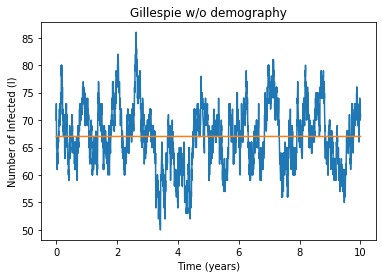

In [2]:
beta = 0.03
gamma = 1 / 100.0
Y = 70.0
N = 100.0
X = N - Y

Y_data, x = discrete_event(X, Y, N, beta, gamma, 10*365)
mean_Y = np.full(len(x), np.mean(Y_data))

plt.plot(np.array(x)/365, Y_data)
plt.plot(np.array(x)/365, mean_Y)
plt.title("Gillespie w/o demography")
plt.xlabel("Time (years)")
plt.ylabel("Number of Infected (I)")
plt.savefig("simple_gillespie_wo_demo_1.png", dpi=300)
plt.show()

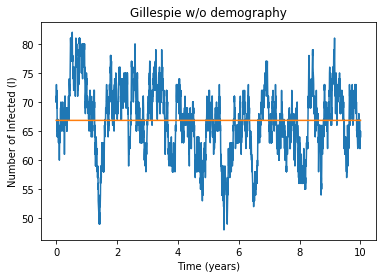

In [3]:
beta = 0.03
gamma = 1 / 100.0
Y = 70.0
N = 100.0
X = N - Y

Y_data, x = discrete_event(X, Y, N, beta, gamma, 10*365)
mean_Y = np.full(len(x), np.mean(Y_data))

plt.plot(np.array(x)/365, Y_data)
plt.plot(np.array(x)/365, mean_Y)
plt.title("Gillespie w/o demography")
plt.xlabel("Time (years)")
plt.ylabel("Number of Infected (I)")
plt.savefig("simple_gillespie_wo_demo_2.png", dpi=300)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def gillespie_demography(pop, beta, gamma, mu):
    X, Y, Z = pop
    Birth = mu * N
    Death_X = mu * X
    Death_Y = mu * Y
    Death_Z = mu * Z
    Transmission = beta * X * Y / N
    Recovery = gamma * Y
    
    events = [[1, 0, 0], [-1, 0, 0], [0, -1, 0], [0, 0, -1], [-1, 1, 0], [0, -1, 1]]
    
    event_rates = [Birth, Death_X, Death_Y, Death_Z, Transmission, Recovery]
    R_total = np.sum(event_rates)
    
    rand_vec = np.random.rand(1, 6)
    
    with np.errstate(divide='ignore'):
        event_rates_t = np.divide(-np.log(rand_vec), event_rates)
    
    delta_t = np.min(event_rates_t)
    
    pop = np.array([X, Y, Z])
    pop += events[np.argmin(event_rates_t)]
    
    return list(pop), delta_t

def discrete_event_demography(pop, beta, gamma, mu, tot_time):
    pop_data = [pop]
    time = [0]
    while time[-1] < tot_time:
        pop, delta_t = gillespie_demography(pop, beta, gamma, mu)

        pop_data.append(pop)
        time.append(time[-1] + delta_t)
        
    return pop_data, time

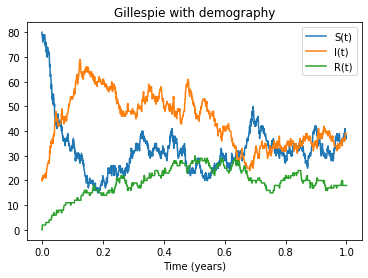

10.02 32.93132411067194


In [5]:
beta = 0.1
gamma = 1 / 100.0
mu = 0.02
R_0 = beta / gamma + mu

Y = 20.0
X = 80.0
Z = 0
pop = [X, Y, Z]

# gillespie_demography(pop, beta, gamma, mu)

pop_data, x = discrete_event_demography(pop, beta, gamma, mu, 1*365)

pop_data = np.array(pop_data)

plt.plot(np.array(x)/365, pop_data[:,0], label="S(t)")
plt.plot(np.array(x)/365, pop_data[:,1], label="I(t)")
plt.plot(np.array(x)/365, pop_data[:,2], label="R(t)")
plt.title("Gillespie with demography")
plt.xlabel("Time (years)")
plt.legend()
plt.savefig("gillespie_w_demography_short.png", dpi=300)
plt.show()
print(R_0, np.mean(pop_data[:,0]))

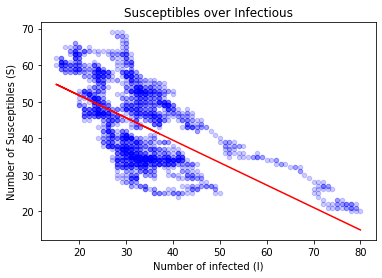

[[103.31559765 -63.35909716]
 [-63.35909716 113.48806805]]


In [6]:
plt.figure()
plt.scatter(pop_data[:,0], pop_data[:,1], alpha=0.2, c="blue", s=20)


z = np.polyfit(pop_data[:,0], pop_data[:,1], 1)
p = np.poly1d(z)
plt.plot(pop_data[:,0],p(pop_data[:,0]),"r-")
plt.title("Susceptibles over Infectious")
plt.xlabel("Number of infected (I)")
plt.ylabel("Number of Susceptibles (S)")
plt.savefig("neg_cov.png", dpi=300)
plt.show()
print(np.cov(pop_data[:,0], pop_data[:,1]))

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def gillespie_demography_import(pop, beta, gamma, mu, delta, epsilon):
    X, Y, Z = pop
    N = sum(pop)
    Birth = mu * N
    Death_X = mu * X
    Death_Y = mu * Y
    Death_Z = mu * Z
    Transmission = beta * X * Y / N
    Recovery = gamma * Y
    Infected_Import = delta * N
    Ext_Source = epsilon * X
    
    events = [[1, 0, 0], [-1, 0, 0], [0, -1, 0], [0, 0, -1], [-1, 1, 0], [0, -1, 1], [0, 1, 0], [-1, 1, 0]]
    
    event_rates = [Birth, Death_X, Death_Y, Death_Z, Transmission, Recovery, Infected_Import, Ext_Source]
    R_total = np.sum(event_rates)
    
    rand_vec = np.random.rand(1, len(event_rates))
    
    with np.errstate(divide='ignore'):
        event_rates_t = np.divide(-np.log(rand_vec), event_rates)
    
    delta_t = np.min(event_rates_t)
    
    pop = np.array([X, Y, Z])
    pop += events[np.argmin(event_rates_t)]
    
    return list(pop), delta_t

def discrete_event_demography_import(pop, beta, gamma, mu, delta, epsilon, tot_time):
    pop_data = [pop]
    time = [0]
    while time[-1] < tot_time:
        pop, delta_t = gillespie_demography_import(pop, beta, gamma, mu, delta, epsilon)

        pop_data.append(pop)
        time.append(time[-1] + delta_t)
        
    return pop_data, time

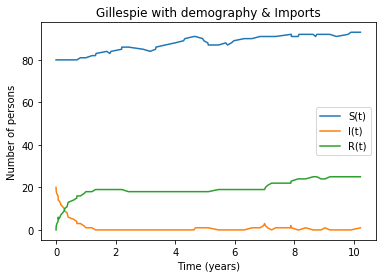

0.02745205479452055 86.39473684210526


In [8]:
beta = 0.1/365
gamma = 1 / 100.0
mu = 0.02/365
R_0 = beta / gamma + mu

Y = 20.0
X = 80.0
Z = 0
pop = [X, Y, Z]
delta = 0.01/365
epsilon = delta * R_0 / N

pop_data, x = discrete_event_demography_import(pop, beta, gamma, mu, delta, epsilon, 10*365)

pop_data = np.array(pop_data)

plt.plot(np.array(x)/365, pop_data[:,0], label="S(t)")
plt.plot(np.array(x)/365, pop_data[:,1], label="I(t)")
plt.plot(np.array(x)/365, pop_data[:,2], label="R(t)")
plt.title("Gillespie with demography & Imports")
plt.xlabel("Time (years)")
plt.ylabel("Number of persons")
plt.legend()
plt.savefig("imports.png", dpi=300)
plt.show()
print(R_0, np.mean(pop_data[:,0]))

## Meta-population model

In [9]:
def meta_pop_model(pop_1, pop_2, beta_i, beta_j, gamma_i, gamma_j, rho_ij, rho_ji):
    X_i, Y_i, R_i = pop_1
    X_j, Y_j, R_j = pop_2
    N_i = sum(pop_1)
    N_j = sum(pop_2)
    
    total_pop_matrix = np.concatenate([np.array(pop_1), np.array(pop_2)], axis=0).reshape(2, 3)

    T_i = beta_i * X_i * (rho_ij * (X_j / N_i))
    R_i = gamma_i * Y_i
    T_j = beta_j * X_j * (rho_ji * (X_i / N_j))
    R_j = gamma_j * Y_j
    
    events = [[-1, 1, 0, 0, 0, 0], [0, -1, 1, 0, 0, 0], [0, 0, 0, -1, 1, 0], [0, 0, 0, 0, -1, 1]]
    
    event_rates = [T_i, R_i, T_j, R_j]
    R_total = np.sum(event_rates)
    
    rand_vec = np.random.rand(1, 4)
    
    with np.errstate(divide='ignore'):
        event_rates_t = np.divide(-np.log(rand_vec), event_rates)
    
    delta_t = np.min(event_rates_t)
    total_pop_matrix += np.array(events[np.argmin(event_rates_t)]).reshape(2, 3)

    return list(total_pop_matrix[0]), list(total_pop_matrix[1]), delta_t

def discrete_event_meta_pop_model(pop_1, pop_2, beta_i, beta_j, gamma_i, gamma_j, rho_ij, rho_ji, tot_time):
    pop_1_data = [pop_1]
    pop_2_data = [pop_2]
    time = [0]

    while time[-1] < tot_time and pop_1_data[-1][0] >= 0 and pop_2_data[-1][0] >= 0:
        pop_1, pop_2, delta_t =  meta_pop_model(pop_1, pop_2, beta_i, beta_j, gamma_i, gamma_j, rho_ij, rho_ji)
        
        pop_1_data.append(pop_1)
        pop_2_data.append(pop_2)
        time.append(time[-1] + delta_t)
        
    return pop_1_data, pop_2_data, time

In [10]:
pop_1 = [100, 20, 0]
pop_2 = [100, 20, 0]

beta_1 = 0.1
gamma_1 = 1 / 100.0

beta_2 = 0.1
gamma_2 = 1 / 100.0

rho_12, rho_21 = 0.1, 0.9

tot_time = 10*365

pop_1_data, pop_2_data, time = discrete_event_meta_pop_model(pop_1, pop_2, beta_1, beta_2, gamma_1, gamma_2, rho_12, rho_21, tot_time)

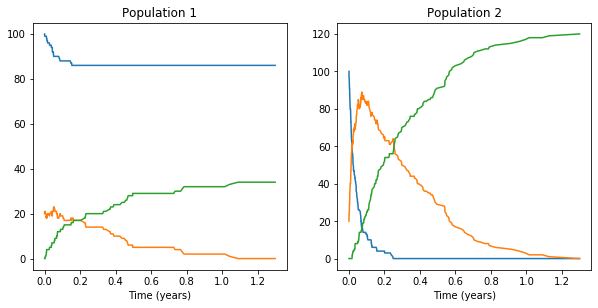

In [11]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(np.array(time)/365, pop_1_data)
plt.title("Population 1")
plt.xlabel("Time (years)")
plt.subplot(2, 2, 2)
plt.plot(np.array(time)/365, pop_2_data)
plt.title("Population 2")
plt.xlabel("Time (years)")
plt.savefig("meta_pop_simple.png", dpi=300)
plt.show()

In [12]:
def meta_pop_model_multi(population, beta, gamma, rho):
    events = [[-1, 1, 0], [0, -1, 1]]

    rates = []

    for i in range(len(population)):
        temp_T = 0
        if i > 0:
            temp_T += rho[i - 1] * (population[i - 1][0] / sum(population[i]))
        if i < len(population) - 1:
            temp_T += rho[i + 1] * (population[i + 1][0] / sum(population[i]))

        temp_T = temp_T * beta * population[i][0]
        temp_R = gamma * population[i][1]

        rates.append([temp_T, temp_R])

    event_rates = np.stack(rates)
    R_total = np.sum(rates)
    rand_vec = np.random.rand(len(event_rates), 2)

    with np.errstate(divide='ignore'):
        event_rates_t = np.divide(-np.log(rand_vec), event_rates)

    delta_t = np.min(event_rates_t)
    lowest_coordinates = np.unravel_index(event_rates_t.argmin(), event_rates_t.shape)

    population[lowest_coordinates[0]] += events[lowest_coordinates[1]]
        
    return population, delta_t

def discrete_event_meta_pop_model_multi(no_of_populations, beta, gamma, tot_time):
    population_init = []
    rho = np.linspace(0, 0.9, no_of_populations)
    for i in range(no_of_populations):
        infected = np.random.randint(0, 10)
        population_init.append([100, infected, 0])

    population = np.stack(population_init)
    
    population_data = [population]
    time = [0]
    while time[-1] < tot_time:
        
        temp = np.array(population_data[-1])
        population_t, delta_t =  meta_pop_model_multi(temp, beta, gamma, rho)
        if (population_t < 0).any():
            break
        population_data.append(population_t)
        time.append(time[-1] + delta_t)
        
    return population_data, time

In [13]:
beta = 0.1
gamma = 1 / 100.0
tot_time = 1*365

pop_data, time = discrete_event_meta_pop_model_multi(8, beta, gamma, tot_time)

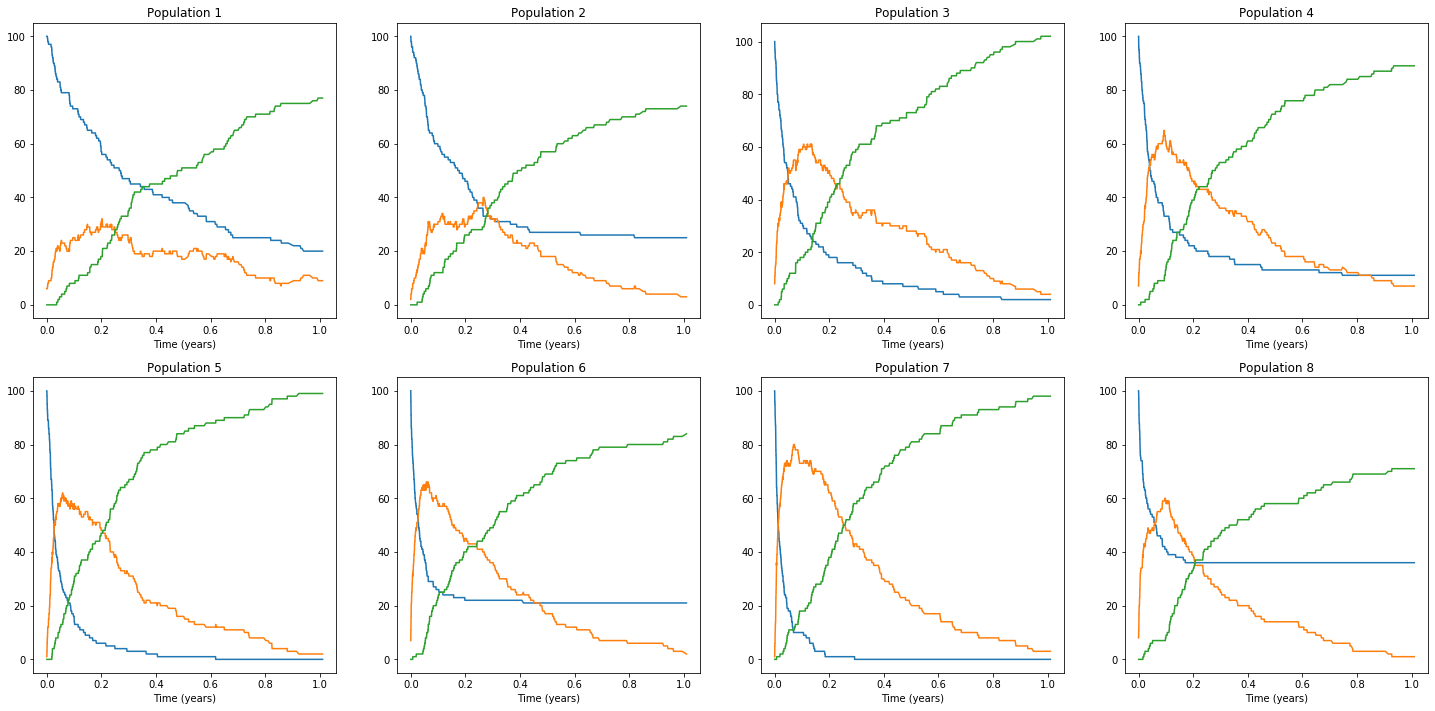

In [14]:
total_data = []
for j in range(len(pop_data[0])):
    temp = []
    for i in pop_data:
        temp.append(i[j])
    total_data.append(temp)

plt.figure(figsize=(25, 25))
for i in range(len(total_data)):
    plt.subplot(4,4, i+1)
    plt.plot(np.array(time)/365, total_data[i])
    plt.title("Population {0}".format(i + 1))
    plt.xlabel("Time (years)")
    
plt.savefig("multiple_meta.png", dpi=300)
plt.show()

## Lattice Model

In [90]:
class Population:
    def __init__(self, population, parameters, coordinates):
        self.X, self.Y, self.Z = population
        self.beta, self.gamma, self.mu, self.rho = parameters
        self.N = sum(population)

        self.coordinates = coordinates
        
        self.left = None
        self.right = None
        self.up = None
        self.down = None
        
    def find_neighbors(self):
        neighbors = []
        if self.left:
            neighbors.append(self.left)
        if self.right:
            neighbors.append(self.right)
        if self.up:
            neighbors.append(self.up)
        if self.down:
            neighbors.append(self.down)
        return neighbors
        
    def get_rates(self):
        neighbors = self.find_neighbors()
        if all([i.Y < 1 for i in neighbors]):
            return False
        temp_nom = 0
        temp_denom = 0
        for neighbor in neighbors:
            temp_nom += self.rho * neighbor.Y
            temp_denom += self.rho * neighbor.N
            
        temp_nom = self.beta * self.X * ((1 - len(neighbors) * self.rho) + temp_nom)
        temp_denom = (1 - (len(neighbors))* self.rho)  * self.N + temp_denom
        
        with np.errstate(divide='ignore'):
            transmission = np.divide(temp_nom , temp_denom)

        recovery = self.gamma * self.Y
        birth = self.mu * self.N
        death_X = self.mu * self.X
        death_Y = self.mu * self.Y
        death_Z = self.mu * self.Z
        
        return transmission, recovery, birth, death_X, death_Y, death_Z
    
    def update_node(self):
        rates = self.get_rates()
        if rates is False:
            return [self.X, self.Y, self.Z]
        transmission, recovery, birth, death_X, death_Y, death_Z = rates
        rand_number = np.random.rand(1)
        X = self.X
        Y = self.Y
        Z = self.Z
        if rand_number > 0.66:
            X = self.X + birth - transmission - death_X
        if rand_number < 0.33:
            Y = self.Y + transmission - death_Y - recovery
        if rand_number >= 0.33 and rand_number <= 0.66:
            Z = self.Z + recovery - death_Z
        new_pop = [X, Y, Z]
        return new_pop
        
    def __repr__(self):
        return "{0}".format(int(self.Y))

In [92]:
class World:
    def __init__(self, dimension, parameters):
        """ Dimension can be an odd number between 0 - 20 """
        self.origin = None
        self.dimension = dimension
        self.parameters = parameters

        self.middle = [int((dimension) / 2), int((dimension) / 2)]
        for i in range(dimension):
            for j in range(dimension):
                if j == 0 and i == 0:
                    self.origin = Population((100, 0, 0), self.parameters, (i, j))
                    continue
                    
                if j != 0 and i == 0:
                    self.create_world_y((i, j))
                    continue
                    
                if i != 0 and j == 0:
                    self.create_world_x((i, j))
                    continue
                    
                else:
                    node = self.create_world_regular((i, j))
                    
    def update_world(self):
        temp_pop_dict = {}
        for i in range(self.dimension):
            for j in range(self.dimension):
                node = self.find_node((i, j))
                temp_pop_dict[(i, j)] = node.update_node()
        for i in range(self.dimension):
            for j in range(self.dimension):
                node_new_pop = temp_pop_dict[(i, j)]
                node = self.find_node((i, j))
                node.X, node.Y, node.Z = node_new_pop
        
        return self

    def find_node(self, coordinates):
        """Returns node given the coordinates"""
        node = self.origin
        y = 0
        while node.up and y < coordinates[1]:
            node = node.up
            y += 1
        x = 0
        while node.right and x < coordinates[0]:
            node = node.right
            x += 1
        if node.coordinates != coordinates:
            return None
        else:
            return node
                    
    def create_world_x(self, coordinates):
        """ Create x-axis nodes """
        node = self.origin
        for i in range(coordinates[0]):
            if node.right == None:
                node.right = Population((100, 0, 0), self.parameters, coordinates)
                node.right.left = node
                return node.right
            else:
                node = node.right
                
    def create_world_y(self, coordinates):
        """ Create y-axis nodes """
        node = self.origin
        for i in range(coordinates[1]):
            if node.up == None:
                node.up = Population((100, 0, 0), self.parameters, coordinates)
                node.up.down = node
                return node.up
            else:
                node = node.up
        
    def create_world_regular(self, coordinates):
        """ Create nodes nodes not x- nor y-axes""" 
        node = self.find_node((coordinates[0] - 1, coordinates[1]))

        node.right = Population((100, 0, 0), self.parameters, coordinates)
        node.right.left = node
        node_down = self.find_node((coordinates[0], coordinates[1] - 1))
        node_down.up = node.right
        node.right.down = node_down
        
        return node.right
    
    def insert_infection(self, no_infected, radius):
        """ Inserts infection """
        node = self.origin
        while node.up:
            node = node.up
        
        while node:
            temp = node
            while node:
                if (abs(self.middle[0] - node.coordinates[0]) + abs(self.middle[1] - node.coordinates[1])) == radius:
                    node.X -= no_infected
                    node.Y += no_infected
                node = node.right
            node = temp.down       
        

    def get_np_array(self):    
        grid = []
        node = self.origin
        while node.up:
            node = node.up
        
        while node:
            temp = node
            temp_row = []
            while node:
                temp_row.append(node.Y)
                node = node.right
            grid.append(temp_row)
            node = temp.down

        return np.array(grid)
    
        
    def __str__(self):
        grid_string = ""
        
        node = self.origin
        while node.up:
            node = node.up
        
        while node:
            temp = node
            while node:
                grid_string += "{0} ".format(node)
                node = node.right
            node = temp.down
            grid_string += "\n"
            
        return grid_string

In [93]:
world_1 = World(41, (0.1, 0.01, 5e-4, 0.1))
world_1.insert_infection(10, 10)
steps = 0

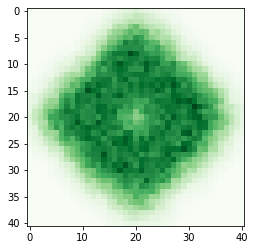

In [98]:
for i in range(100):
    steps += 1
    world_1.update_world()

plt.imshow(world_1.get_np_array(), cmap='Greens', interpolation='nearest', animated= True)
plt.savefig("world_{0}_steps.png".format(steps), dpi=300)

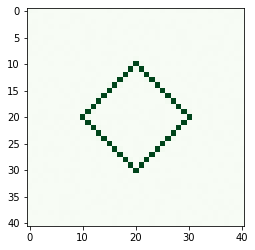

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure()
i=0
im = plt.imshow(world_1.get_np_array(), cmap='Greens', interpolation='nearest', animated= True)
def updatefig(*args):
    global i
    if (i<99):
        i += 1
    else:
        i=0
    world_1.update_world()
    im.set_array(world_1.get_np_array())
    return im,
anim = animation.FuncAnimation(fig, updatefig,  blit=True)

In [48]:
HTML(anim.to_html5_video())